# Chapter 1.2

In [19]:
import numpy as np
import tensorflow as tf
from sympy import solve
from sympy.abc import a, b, c, d, e, f, g, I
from sympy.core.add import Add
from sympy.core.symbol import Symbol
from typing import List, Dict
from dataclasses import dataclass, field
from functools import reduce
from IPython.display import display, Image

## Exercise 1.2.17

Consider the following circuit:

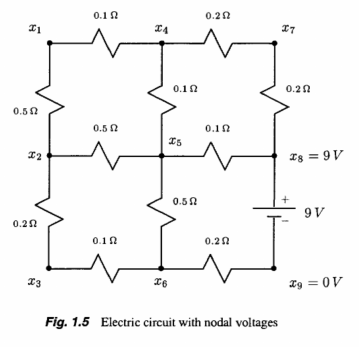

In [2]:
display(Image("/home/choct155/projects/math/linAlg/matrixComputations/docs/tex/img/fig_1_5_circuit.png"))

There are seven unknown voltages at nodes $x_1$ through $x_7$. Let $x_1 = a$, $x_2 = b$, ... $x_7 = g$

\begin{align}
    0.5(a - b) + 0.1(x_1 - x_4) &= 0 \\
    0.5(x_2 - x_1) + 0.2(x_2 - x_3) + 0.5(x_2 - x_-5) &= 0 \\
    0.2(x_3 - x_2) + 0.1(x_3 - x_6) &= 0 \\
    0.5(x_1 - x_2) + 0.1(x_1 - x_4) &= 0 \\
    0.5(x_1 - x_2) + 0.1(x_1 - x_4) &= 0 \\
    0.5(x_1 - x_2) + 0.1(x_1 - x_4) &= 0 \\
    0.5(x_1 - x_2) + 0.1(x_1 - x_4) &= 0
\end{align}

\begin{align}
    0.5(a - b) &= I_1 \\
    0.1(a - d) &= I_4 \\
    I_1 + I_4 &= 0
\end{align}

In [3]:
for expression in [0.5*(a - b) - I, 0.1*(a - d) - I]:
    print(solve(expression, I))
    print(type(solve(expression, I)[0]))

[0.5*a - 0.5*b]
<class 'sympy.core.add.Add'>
[0.1*a - 0.1*d]
<class 'sympy.core.add.Add'>


In [23]:
@dataclass
class CircuitNode:
    label: str
    resistor_exprs: List[Add]
    current_symbol: Symbol
    node_expr: Add = field(default_factory=Add)

    def __post_init__(self) -> None:
        has_c_symbol: Dict[int, bool] = {
            idx: le.has(self.current_symbol) for idx, le in enumerate(self.resistor_exprs)
        }
        if not all(has_c_symbol.values()):
            missing_symbol: Dict[int, bool] = {
                idx: test_val for idx, test_val in has_c_symbol.items() if not test_val
            }
            msg: str = f"""
            All resistor expressions must contain the current symbol!
            The following do not:
            {missing_symbol}
            """
            raise ValueError(msg)
            
        current_expressions: List[Add] = CircuitNode.solve_for_current(self.resistor_exprs)
        self.node_expr: Add = CircuitNode.combine_resistor_exprs(current_expressions)

    @staticmethod
    def solve_for_current(resistor_exprs: List[Add]) -> List[Add]:
        out: List[Add] = list(map(lambda le: solve(le, I)[0], resistor_exprs))
        return out
    
    @staticmethod
    def combine_resistor_exprs(resistor_exprs: List[Add]) -> Add:
        out: Add = reduce(lambda first, second: first + second, resistor_exprs)
        return out

x1: CircuitNode = CircuitNode("x1", [0.5*(a - b) - I, 0.1*(a - d) - I], I)
    
x1

CircuitNode(label='x1', resistor_exprs=[-I + 0.5*a - 0.5*b, -I + 0.1*a - 0.1*d], current_symbol=I, node_expr=0.6*a - 0.5*b - 0.1*d)

In [24]:
CircuitNode.solve_for_current(x1.resistor_exprs)

[0.5*a - 0.5*b, 0.1*a - 0.1*d]

In [18]:
sum([test, test2])

2*a + b + c

In [34]:
test.has(I)

True

In [28]:
dir(test)

['__abs__',
 '__add__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__sympy__',
 '__truediv__',
 '__trunc__',
 '_add_handler',
 '_args',
 '_args_type',
 '_assumptions',
 '_combine_inverse',
 '_compare_pretty',
 '_constructor_postprocessor_mapping',
 '_diff_wrt',
 '_eval_adjoint',
 '_eval_as_leading_term',
 '_eval_conjugate',
 '_eval_derivative',
 '_eval_de

TypeError: 'tuple' object is not callable